In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
eq_data = pd.read_csv('Sig_Eqs.tsv',sep = '\t')
plt.rcParams['figure.dpi'] = 100

In [56]:
#1.1

In [57]:
df_td = eq_data.groupby(['Country']).sum()
df_td
df_td2 = df_td.sort_values('Total Deaths',ascending=False).head(10)['Total Deaths']
print(df_td2)
df_td3 = df_td.sum()['Total Deaths']
print(df_td3)


Country
CHINA         2041784.0
TURKEY         867654.0
IRAN           758638.0
ITALY          359064.0
JAPAN          355137.0
SYRIA          337700.0
HAITI          323770.0
AZERBAIJAN     310119.0
INDONESIA      280351.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64
7162533.0


In [58]:
#1.2

2870


<AxesSubplot:xlabel='Year', ylabel='times'>

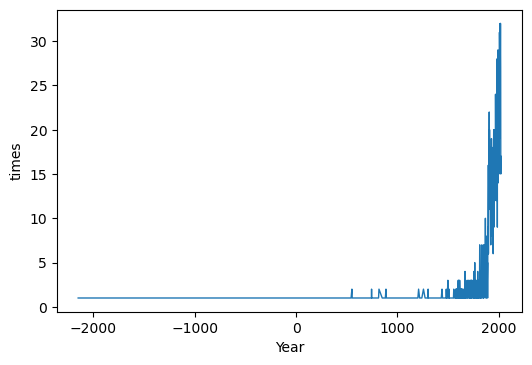

In [59]:
mag_df = eq_data[eq_data['Mag']>6.0].count()
print(mag_df['Mag'])
eq_data[eq_data['Mag']>6].groupby('Year').count()['Country'].plot(lw=1,ylabel = 'times')

#趋势：1500年之后6.0震级的地震上升趋势明显
#原因可能是之前没有记录


In [60]:
#1.3

In [61]:
def CountEq_LargestEq(country):
    
    CountEq_df = len(eq_data[eq_data['Country'] == country])
    
    LargestEq = eq_data[eq_data['Country'] == country].sort_values('Mag',ascending = False).iloc[0][['Year','Mo','Dy','Mag']]
    date = str(LargestEq['Year'])[:-2]+'-'+str(LargestEq['Mo'])[:-2].zfill(2)+'-'+str(LargestEq['Dy'])[:-2].zfill(2)
    
    return CountEq_df,date



In [62]:
country_list = eq_data['Country'].unique() 

arr_eqdata= np.full((country_list.shape[0]-1,2),np.nan)

In [63]:
df_0 = pd.DataFrame(arr_eqdata,index=country_list[1:],columns=['count','date of biggest mag'])

In [64]:
for country in country_list[1:]:
    df_0.loc[country,['count','date of biggest mag']]=CountEq_LargestEq(country)

In [65]:
df_0.sort_values('count',ascending=False)

,count,date of biggest mag
CHINA,610.0,1668-07-25
JAPAN,409.0,2011-03-11
INDONESIA,401.0,2004-12-26
IRAN,380.0,856-12-22
TURKEY,330.0,1912-08-09
...,...,...
NORWAY,1.0,1819-08-31
CENTRAL AFRICAN REPUBLIC,1.0,1921-09-16
PALAU,1.0,1914-10-23
KIRIBATI,1.0,1905-06-30
